# ENUNCIADO DA QUESTÃO

Missão AstroJúnior: explorando novos mundos!

No ano de 2075, a humanidade expandiu suas viagens pelo universo, e jovens cadetes da Academia Espacial foram selecionados para a grande Missão AstroJúnior. Seu objetivo: explorar planetas desconhecidos e coletar dados para ajudar cientistas da Terra a entender esses novos mundos.

Cada equipe recebeu um conjunto de sensores de alta tecnologia para medir diferentes aspectos dos planetas visitados. Os dados coletados foram processados e codificados em uma escala numérica própria de modo a refletir as seguintes grandezas:


TempMédia - Temperatura média do planeta (em graus Celsius);

Gravidade - Intensidade da gravidade em relação à Terra;

PressãoAtm - Pressão atmosférica (em atmosferas terrestres);

Radiação - Nível de radiação presente no planeta;

ComposiçãoAr - Percentual de gases essenciais para a vida humana;

Hidratação - Disponibilidade de água líquida;

Vegetação - Presença de organismos vegetais;

Fauna - Diversidade de formas de vida animal;

SoloFértil - Capacidade do solo de sustentar plantação;

Ventos - Intensidade dos ventos planetários;

Luas - Número de luas orbitando o planeta;

Magnetismo - Força do campo magnético do planeta;

ClimaEstável - Estabilidade das condições climáticas ao longo do tempo;



Com base nesses dados, os cientistas classificarão os planetas em cinco categorias principais:

Classe 0: Planeta Deserto - Muito quente ou frio, sem água e com poucas chances de vida.

Classe 1: Planeta Vulcânico - Alta atividade geotérmica e atmosfera hostil.

Classe 2: Planeta Oceânico - Coberto por vastos oceanos, com possibilidades de vida aquática.

Classe 3: Planeta Florestal - Rico em vegetação, similar à Terra em muitos aspectos.

Classe 4: Planeta Gelado - Extremamente frio, mas com possibilidade de vida subterrânea ou em oceanos sob o gelo.


Agora, cadete, sua missão é analisar os dados coletados e ajudar a classificar cada planeta corretamente. O futuro da exploração espacial está em suas mãos!

A planilha de treinamento (treino.csv) fornecida tem 10.501 linhas e 13 colunas. 

A Figura 1 acima apresenta um pedaço do conjunto de treinamento. A coluna id identifica cada uma das instâncias individualmente, apresentando valores entre 0 a 10.499. A coluna target apresenta valores de 0 a 4, conforme a classificação das categorias de planetas apresentadas anteriormente.

Após treinar o seu modelo, você deve realizar a predição da planilha de teste (teste.csv). A planilha de teste fornecida tem 4.501 linhas e 13 características das instâncias (colunas). Ela contém informações semelhantes à planilha de treinamento, mas é fornecida sem os rótulos (“target”), ou seja, sem as categorias de planetas.

Quando você julgar que criou um modelo competitivo envie suas predições para as categorias dos planetas pela plataforma utilizando um arquivo com a extensão .csv no formato exato como descrito a seguir:

O arquivo .csv deve conter precisamente 4.501 linhas e 2 colunas
Na primeira célula da primeira coluna deve estar escrito a palavra id
Na primeira célula da segunda coluna deve estar escrito a palavra target
Cada linha desse arquivo, com exceção da primeira, deve conter na célula da primeira coluna o “id” (ou seja, um número correspondente à instância) e na célula da segunda coluna o “target” (0, 1, 2, 3, 4)

id, target 
onde:

O id representa o identificador único;
, [vírgula] o separador das duas colunas;
O target, um valor inteiro que pode ser: 4 (Planeta Gelado), 3 (Planeta Florestal), 2 (Planeta Oceânico), 1 (Planeta Vulcânico) ou 0 (Planeta Deserto).


Além do upload do arquivo .csv no local específico para isso, é obrigatório o envio de um pequeno relatório descrevendo: (1) o software/biblioteca utilizada, (2) os passos que o participante utilizou para criar o modelo e (3) explicar os motivos pelos quais determinadas decisões de modelagem foram tomadas. A estrutura do texto, a ser digitado no espaço específico para isso, deve possuir seguinte estrutura:

Software / Biblioteca utilizado: Orange / Scikit-learn
Passos da resolução da Prova: 1. Carregar os dados de treinamento. 2. … 3. …. 
Explicação da escolha do algoritmo de Aprendizado de Máquina: Escolhi Árvore de Decisão porque …


Os resultados serão avaliados pelo desempenho de suas predições sobre o conjunto de teste, utilizando a métrica “Medida-F”.

A Medida-F é a média harmônica entre as métricas de Precisão e Revocação. Em outras palavras, a Medida-F é uma métrica que avalia o desempenho de um modelo preditivo de modo a trazer um número único que indique a sua qualidade geral. 

O arquivo deve ser um CSV com as colunas 'id' e 'target', contendo uma linha para cada previsão (0, 1, 2, etc.)

In [66]:
# passo a passo


# passo 0: entender a empresa e o seu desafio
# passo 1: impotar a base de dados 
import pandas as pd
import numpy as np
import pickle


tabela = pd.read_csv('treino.csv')
display(tabela)

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,target
0,12251,38.763463,4.372530,2.888516,12.352539,18.906550,9.605924,3.456596,3.959477,4.738227,3.692509,11.192263,9.076242,4.692962,2
1,4529,32.192181,3.158109,2.134617,16.193530,26.786878,9.347958,5.093277,6.893790,3.399840,2.080853,19.486692,12.349952,3.217670,0
2,11284,28.370782,3.006067,1.969280,15.163950,28.515109,7.946870,5.609813,6.511194,3.256799,2.290993,18.405205,14.781329,3.231217,0
3,10993,38.215409,2.174232,2.935104,11.501867,18.419571,7.954005,4.229832,4.522060,4.869234,3.383514,12.782517,17.343742,5.009182,2
4,12927,38.904545,2.956164,2.253149,12.282552,25.547887,8.168776,3.653026,6.809110,4.971130,2.127363,19.247327,20.115183,3.560524,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,6951,30.605226,2.172545,1.456766,15.916774,33.872292,7.766799,4.455944,4.866775,5.274495,3.194181,13.756923,15.133962,4.489715,4
10496,8097,37.153719,2.930280,2.514520,10.042402,22.815845,6.018057,5.359753,5.656202,3.601738,2.760592,15.988397,19.794919,3.752870,2
10497,9011,24.316856,2.771631,2.018644,16.082389,27.999121,6.014674,6.209202,4.304756,3.905507,3.502867,12.168262,6.530749,5.191197,0
10498,12617,44.748792,3.174414,1.447737,13.578811,33.966677,8.671664,4.754359,7.941178,3.325981,1.505581,22.447345,21.038993,1.795912,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10500 non-null  int64  
 1   col_0   10500 non-null  float64
 2   col_1   10500 non-null  float64
 3   col_2   10500 non-null  float64
 4   col_3   10500 non-null  float64
 5   col_4   10500 non-null  float64
 6   col_5   10500 non-null  float64
 7   col_6   10500 non-null  float64
 8   col_7   10500 non-null  float64
 9   col_8   10500 non-null  float64
 10  col_9   10500 non-null  float64
 11  col_10  10500 non-null  float64
 12  col_11  10500 non-null  float64
 13  col_12  10500 non-null  float64
 14  target  10500 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 1.2 MB
Distribuição das classes: Counter({0: 3797, 4: 1228, 1: 1203, 2: 1022, 3: 625})


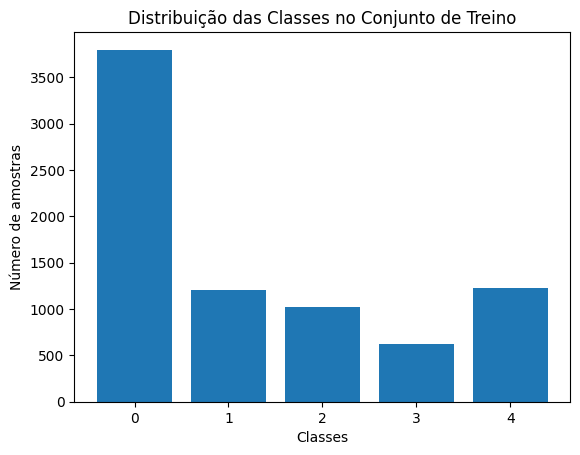

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12
7639,35.378393,3.890161,3.629234,8.414785,11.163993,7.322623,5.012073,4.614171,3.216484,3.332922,13.042886,15.903913,4.278027
9924,38.519998,2.396012,2.431531,15.116112,23.683301,6.171405,5.099667,7.056282,4.694028,1.991606,19.946008,9.223773,4.968726
3986,36.714733,2.856870,1.988272,16.434659,28.316592,10.977846,4.002185,6.606657,4.191293,2.238560,18.675050,15.004171,3.138881
3884,41.680300,3.155459,1.644436,11.241358,31.910625,6.517829,3.847944,7.830656,4.929977,1.566285,22.134933,23.848206,2.791455
5360,39.238127,2.247912,2.804612,12.115297,19.783577,3.813548,6.589401,5.946957,3.565564,2.600896,16.810276,9.992272,5.295236
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3057,29.049702,2.023646,1.996123,14.048195,28.234522,5.017061,3.281836,4.320581,7.665165,3.494175,12.212994,12.808457,6.728426
4045,26.561363,3.613684,1.992232,16.033867,28.275197,9.667873,4.541641,6.472113,3.844337,2.312458,18.294734,13.606541,3.133800
8776,48.856944,2.767955,2.057744,12.709672,27.590416,7.927480,5.572079,4.218499,3.218123,3.550243,11.924441,12.845276,3.909518
9527,38.109612,3.034225,2.020903,14.767217,27.975500,9.714262,4.086751,6.283310,4.300339,2.416157,17.761045,15.891747,3.331513


array([[ 0.15316508,  1.13242391,  2.42692119, ..., -0.96165234,
        -0.25019617,  0.69906887],
       [ 0.52738928, -0.77709188,  0.28031365, ...,  0.96365618,
        -1.97845087,  1.52357136],
       [ 0.31234834, -0.18811655, -0.51412795, ...,  0.60918098,
        -0.48297318, -0.66075408],
       ...,
       [ 1.75871388, -0.30174962, -0.38961513, ..., -1.27359119,
        -1.04151236,  0.25917142],
       [ 0.47850458,  0.03854141, -0.45564305, ...,  0.35426116,
        -0.25334374, -0.43080516],
       [ 0.9179861 , -0.22679102,  1.1548791 , ..., -1.81626   ,
         0.83695297, -0.14827491]], shape=(2625, 13))

In [ ]:
# passo 2: preparar a base de dados para a IA
tabela.info()

# y e quem eu quero prever
y = tabela['target']

# x e o que eu tenho para prever
x = tabela.drop(columns=['id','target'])

#separar dados de treino e dados de teste
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

# comferindo a calidade dos dados
import matplotlib.pyplot as plt
from collections import Counter

# Contar quantas amostras há em cada classe
class_counts = Counter(y_treino)
print("Distribuição das classes:", class_counts)

# Visualizar com um gráfico de barras
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Classes")
plt.ylabel("Número de amostras")
plt.title("Distribuição das Classes no Conjunto de Treino")
plt.show()

from sklearn.preprocessing import StandardScaler

# Criar o normalizador (usando StandardScaler, pois funciona bem para SVM e redes neurais)
scaler = StandardScaler()

# Criar uma cópia dos dados originais
x_treino = x_treino.copy()
x_teste = x_teste.copy()

# Normalizar apenas para os modelos que precisam
x_treino_normalizado = scaler.fit_transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)



In [ ]:
# passo 3: treinar a IA 
# criar modelo

#importar modelo
#nao distancia
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#distancia
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#nao se saiu bem 
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import LogisticRegression

#importar metricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [ ]:

#criar IA
modelo_arvore = DecisionTreeClassifier()
modelo_floresta = RandomForestClassifier()
modelo_xgboost = XGBClassifier(objective='multi:softprob', learning_rate=0.1, n_estimators=500, 
                               max_depth=6, min_child_weight=1, colsample_bytree=0.8, subsample=0.8, gamma=0.1)
modelo_knn = KNeighborsClassifier()
modelo_svm = SVC()

#treinar IA
modelo_arvore.fit(x_treino, y_treino)
modelo_floresta.fit(x_treino, y_treino)
modelo_xgboost.fit(x_treino, y_treino)
modelo_knn.fit(x_treino_normalizado, y_treino)
modelo_svm.fit(x_treino_normalizado, y_treino)


LogisticRegression()

In [ ]:
# passo 4: qual o melhor modelo de IA
previsao_arvore = modelo_arvore.predict(x_teste)
previsao_floresta = modelo_floresta.predict(x_teste)
previsao_xgboost = modelo_xgboost.predict(x_teste)
previsao_knn = modelo_knn.predict(x_teste_normalizado) 
previsao_svm = modelo_svm.predict(x_teste_normalizado)

print(classification_report(y_teste, previsao_arvore))
print(classification_report(y_teste, previsao_floresta))
print(classification_report(y_teste, previsao_xgboost))
print(classification_report(y_teste, previsao_knn))
print(classification_report(y_teste, previsao_svm))

print(confusion_matrix(y_teste, previsao_arvore))
print(confusion_matrix(y_teste, previsao_floresta))
print(confusion_matrix(y_teste, previsao_xgboost))
print(confusion_matrix(y_teste, previsao_knn))
print(confusion_matrix(y_teste, previsao_svm))


0.6217142857142857

0.76

0.780952380952381

0.7748571428571429

0.7664761904761904

0.552

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1299
           1       0.50      0.48      0.49       390
           2       0.51      0.45      0.48       367
           3       0.35      0.38      0.36       188
           4       0.50      0.52      0.51       381

    accuracy                           0.62      2625
   macro avg       0.52      0.52      0.52      2625
weighted avg       0.62      0.62      0.62      2625

              precision    recall  f1-score   support

           0       0.78      0.95      0.85      1299
           1       0.72      0.65      0.68       390
           2       0.73      0.58      0.65       367
           3       0.70      0.34      0.46       188
           4       0.77      0.61      0.68       381

    accuracy                           0.76      2625
   macro avg       0.74      0.63      0.66      2625
weighted avg       0.75      0.76      0.75      2625

              precisio

In [55]:
#preparativos para o modelo xgboost
# calculando y_train para o array com as classes (0, 1, 2, 3, 4)
classes, counts = np.unique(y_treino, return_counts=True)

# Total de amostras e de cada classe
total_samples = len(y_treino)

# Calculando o peso para cada classe
scale_pos_weights = total_samples / counts

In [56]:
# novo treiramento com ajustes

modelo_floresta2 = RandomForestClassifier(
    n_estimators=300, 
    max_depth=30, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    max_features='sqrt', 
    bootstrap=True,  
    class_weight='balanced', 
    random_state=42)

modelo_xgboost2 = XGBClassifier(
    objective='multi:softprob',
    learning_rate=0.1,
    n_estimators=500,
    max_depth=6, 
    min_child_weight=1, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    gamma=0.1,
    scale_pos_weight= scale_pos_weights,
    use_label_encoder=False,
    eval_metric="logloss")

modelo_knn2 = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None)

modelo_svm2 = SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight='balanced',
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None)

modelo_floresta2.fit(x_treino, y_treino)
modelo_xgboost2.fit(x_treino, y_treino)
modelo_knn2.fit(x_treino_normalizado, y_treino)
modelo_svm2.fit(x_treino_normalizado, y_treino)

c:\Users\geral\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:27:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


SVC(class_weight='balanced')

In [ ]:
# Preparativos para o modelo XGBoost 
classes, counts = np.unique(y_treino, return_counts=True)
total_samples = len(y_treino)
scale_pos_weights = total_samples / counts

# Novo treinamento com ajustes via RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
# --- Ajuste de hiperparâmetros para Random Forest ---
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_tuner = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)
rf_tuner.fit(x_treino, y_treino)
best_rf_params = rf_tuner.best_params_
print("Melhores parâmetros Random Forest:", best_rf_params)

# Treinamento final com os melhores parâmetros para Random Forest
modelo_floresta2 = RandomForestClassifier(
    **best_rf_params, 
    class_weight='balanced', 
    random_state=42
)
modelo_floresta2.fit(x_treino, y_treino)

# --- Ajuste de hiperparâmetros para XGBoost ---
param_dist_xgb = {
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'colsample_bytree': uniform(0.6, 0.4),
    'subsample': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.2)
}

xgb_tuner = RandomizedSearchCV(
    estimator=XGBClassifier(objective='multi:softprob', use_label_encoder=False, eval_metric="logloss"),
    param_distributions=param_dist_xgb,
    n_iter=20,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)
xgb_tuner.fit(x_treino, y_treino)
best_xgb_params = xgb_tuner.best_params_
print("Melhores parâmetros XGBoost:", best_xgb_params)

# Treinamento final com os melhores parâmetros para XGBoost
modelo_xgboost2 = XGBClassifier(
    **best_xgb_params,
    objective='multi:softprob',
    scale_pos_weight=scale_pos_weights,  # Inclua se necessário para compensar o desbalanceamento
    use_label_encoder=False,
    eval_metric="logloss"
)
modelo_xgboost2.fit(x_treino, y_treino)

# --- Ajuste de hiperparâmetros para SVM ---
param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 5))  # Valores de gamma
}

svm_tuner = RandomizedSearchCV(
    estimator=SVC(class_weight='balanced', probability=True, random_state=42),
    param_distributions=param_dist_svm,
    n_iter=20,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)
svm_tuner.fit(x_treino, y_treino)
best_svm_params = svm_tuner.best_params_
print("Melhores parâmetros SVM:", best_svm_params)

# Treinamento final com os melhores parâmetros para SVM
modelo_svm2 = SVC(
    **best_svm_params,
    class_weight='balanced',
    probability=True,
    random_state=42
)
modelo_svm2.fit(x_treino, y_treino)

# --- Ajuste de hiperparâmetros para KNN ---
param_dist_knn = {
    'n_neighbors': randint(3, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_tuner = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_dist_knn,
    n_iter=20,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)
knn_tuner.fit(x_treino, y_treino)
best_knn_params = knn_tuner.best_params_
print("Melhores parâmetros KNN:", best_knn_params)

# Treinamento final com os melhores parâmetros para KNN
modelo_knn2 = KNeighborsClassifier(
    **best_knn_params
)
modelo_knn2.fit(x_treino, y_treino)

c:\Users\geral\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\geral\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\geral\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\U

Melhores parâmetros Random Forest: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 317}


c:\Users\geral\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:14:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Melhores parâmetros XGBoost: {'colsample_bytree': np.float64(0.7760609974958406), 'gamma': np.float64(0.024407646968955768), 'learning_rate': np.float64(0.10903538202225403), 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 305, 'subsample': np.float64(0.7564242430292963)}


c:\Users\geral\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:14:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.7760609974958406), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=np.float64(0.024407646968955768), grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.10903538202225403), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=305, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
hiperparametros = {
    "RandomForest": best_rf_params,  # Substitua pelo nome correto
    "XGBoost": best_xgb_params,  # Substitua pelo nome correto
    "KNN": best_knn_params,  # Substitua pelo nome correto
    "SVM": best_svm_params   # Substitua pelo nome correto
}

# Função para salvar os modelos, hiperparâmetros e previsões
def salvar_resultados(modelo_floresta, modelo_xgboost, modelo_knn, modelo_svm, hiperparametros, 
                      previsao_floresta, previsao_xgboost, previsao_knn, previsao_svm, tabela_nova):
    
    caminho_base = "resultados_modelos/"
    
    # Salvar os modelos treinados
    with open(caminho_base + "modelo_floresta.pkl", "wb") as f:
        pickle.dump(modelo_floresta, f)
    
    with open(caminho_base + "modelo_xgboost.pkl", "wb") as f:
        pickle.dump(modelo_xgboost, f)

    with open(caminho_base + "modelo_knn.pkl", "wb") as f:
        pickle.dump(modelo_knn, f)

    with open(caminho_base + "modelo_svm.pkl", "wb") as f:
        pickle.dump(modelo_svm, f)

    # Salvar os hiperparâmetros
    with open(caminho_base + "hiperparametros.pkl", "wb") as f:
        pickle.dump(hiperparametros, f)

    # Salvar as previsões em um arquivo CSV
    df_previsoes = pd.DataFrame({
        "Previsao_RandomForest": previsao_floresta,
        "Previsao_XGBoost": previsao_xgboost,
        "Previsao_KNN": previsao_knn,
        "Previsao_SVM": previsao_svm
    })
    df_previsoes.to_csv(caminho_base + "previsoes.csv", index=False)

    # Salvar a tabela_nova, se necessário
    tabela_nova.to_csv(caminho_base + "tabela_nova.csv", index=False)

    print("Modelos, hiperparâmetros e previsões salvos com sucesso!")

# --- Antes de chamar a função, verifique se as variáveis estão corretamente definidas ---
print("Variáveis definidas:")
variaveis = {
    "modelo_floresta": "modelo_floresta2",
    "modelo_xgboost": "modelo_xgboost2",
    "modelo_knn": "modelo_knn2",
    "modelo_svm": "modelo_svm2",
    "hiperparametros": "hiperparametros",
    "previsao_floresta": "previsao_floresta2",
    "previsao_xgboost": "previsao_xgboost2",
    "previsao_knn": "previsao_knn2",
    "previsao_svm": "previsao_svm2",
    "tabela_nova": "tabela_nova"
}

for nome, var in variaveis.items():
    print(f"{nome}: {'Definido' if var in locals() else 'Não definido'}")

# --- Chamando a função para salvar os resultados ---
salvar_resultados(modelo_floresta2, modelo_xgboost2, modelo_knn2, modelo_svm2, 
                  hiperparametros, previsao_floresta2, previsao_xgboost2, 
                  previsao_knn2, previsao_svm2, tabela_nova)

print("Melhores hiperparâmetros Random Forest:", modelo_floresta2.get_params())
print("Melhores hiperparâmetros XGBoost:", modelo_xgboost2.get_params())
print("Melhores hiperparâmetros KNN:", modelo_knn2.get_params())
print("Melhores hiperparâmetros SVM:", modelo_svm2.get_params())


NameError: name 'best_knn_params' is not defined

In [61]:
# passo 4: qual o melhor modelo de IA com ajustes

previsao_floresta2 = modelo_floresta2.predict(x_teste)
previsao_xgboost2 = modelo_xgboost2.predict(x_teste) 
previsao_knn2 = modelo_knn2.predict(x_teste_normalizado)
previsao_svm2 = modelo_svm2.predict(x_teste_normalizado)

print(classification_report(y_teste, previsao_floresta2))
print(classification_report(y_teste, previsao_xgboost2))
print(classification_report(y_teste, previsao_knn2))
print(classification_report(y_teste, previsao_svm2))

print(confusion_matrix(y_teste, previsao_floresta2))
print(confusion_matrix(y_teste, previsao_xgboost2))
print(confusion_matrix(y_teste, previsao_knn2))
print(confusion_matrix(y_teste, previsao_svm2))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1299
           1       0.70      0.69      0.70       390
           2       0.72      0.64      0.68       367
           3       0.64      0.46      0.54       188
           4       0.71      0.67      0.69       381

    accuracy                           0.77      2625
   macro avg       0.72      0.67      0.69      2625
weighted avg       0.76      0.77      0.76      2625

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1299
           1       0.72      0.70      0.71       390
           2       0.78      0.65      0.71       367
           3       0.69      0.44      0.54       188
           4       0.75      0.66      0.70       381

    accuracy                           0.79      2625
   macro avg       0.75      0.68      0.71      2625
weighted avg       0.78      0.79      0.78      2625

              precisio

In [44]:
# passo 5: usar o melhor modelo para faser a previsao
# qual o melhor modelo? 

#importar tabela de novos cliemtes
tabela_nova = pd.read_csv('teste.csv')

# Armazena a coluna 'id' separadamente
ids = tabela_nova["id"]

# Remove a coluna 'id' antes da previsão
tabela_nova_sem_id = tabela_nova.drop(columns=['id'], errors='ignore')

# Faz a previsão
nova_previsao = modelo_floresta2.predict(tabela_nova_sem_id)

# Criar um DataFrame com os IDs e as previsões
resultado = pd.DataFrame({"id": ids, "target": nova_previsao})

display(tabela_nova)

display(nova_previsao)

# Exibir o resultado
display(resultado)

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12
0,2142,37.555079,3.205281,1.583984,11.330132,32.542511,6.581602,5.524091,5.202632,3.288405,3.009713,14.706292,20.530879,2.889453
1,3846,28.933095,3.905861,2.171001,14.644065,26.406560,9.515010,4.023027,6.528586,4.202300,2.281440,18.454367,14.862851,3.183574
2,6177,37.082903,3.259937,1.887675,12.313557,29.368109,6.533770,5.088085,5.913968,3.925079,2.619016,16.717026,16.871735,3.512345
3,11779,24.011327,4.599539,2.102587,17.349264,27.121683,12.231295,2.664319,5.226405,5.232794,2.996656,14.773491,9.133299,3.739929
4,1593,31.403592,2.543982,0.533288,14.778941,43.525198,5.225097,7.100292,4.516120,2.753415,3.386776,12.765727,16.675742,3.000528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,11496,37.789367,3.511433,2.814992,10.697124,19.675079,9.844242,3.994824,5.082404,3.762631,3.075747,14.366443,20.097503,3.278142
4496,8856,24.889203,2.508254,2.525974,15.868246,22.696114,6.931519,7.380456,6.599213,1.865822,2.242648,18.654010,10.229343,3.687254
4497,4937,39.208404,2.843656,1.975679,14.071951,28.448221,7.391533,5.525009,3.912253,3.788423,3.718447,11.058774,10.266351,4.531029
4498,7574,24.559490,2.084494,3.359952,12.531981,13.978740,6.302277,6.162282,4.496384,3.523565,3.397616,12.709938,12.636072,5.461903


array([0, 0, 0, ..., 3, 4, 0], shape=(4500,))

,id,target
0,2142,0
1,3846,0
2,6177,0
3,11779,0
4,1593,0
...,...,...
4495,11496,1
4496,8856,4
4497,4937,3
4498,7574,4


In [ ]:
# Salvando para CSV
df = pd.DataFrame(resultado)

df.to_csv("resposta.csv", index=False, header=True, encoding="utf-8")


